# Task 2
This week you have learnt about various types of ML models. <br>
Let us focus on two of them.

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Instructions
1. create a folder called synapse_w2 in your drive
2. add housing_data.csv, classified_data.txt, titanic_data.csv in the folder.
3. You will use the data from this path in this notebook

# 1)  Linear Regression on Housing Price

### Import packages and dataset

In [2]:
# import numpy, pandas, matplotlib, seaborn
# add code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Read housing_data.csv using pandas and call head() to show first few records.**

In [3]:
# add code here
housing_path = "/content/gdrive/MyDrive/synapse_w2/housing_data.csv"
titanic_path = "/content/gdrive/MyDrive/synapse_w2/titanic_data.csv"
classified_path = "/content/gdrive/MyDrive/synapse_w2/classified_data.txt"

housing_df = pd.read_csv(housing_path)
housing_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [4]:
# add code here
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [5]:
# add code here
housing_df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**Print the names of the columns(features)**

In [6]:
# add code here
housing_df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

### Basic plotting and visualization

**The target quantity is price. Let us see its distribution.** <br>
Plot a histogram of Price. Choose the number of bins by experimenting a little. (Expected: a bell curve shape)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f09d7a2c910>]],
      dtype=object)

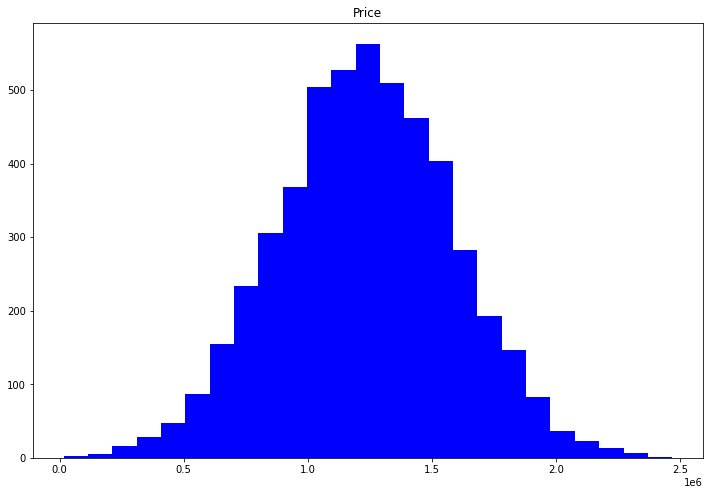

In [7]:
# add code here
housing_df.hist(column='Price', grid=False, bins=25, figsize=(12,8), color='Blue')

**Let us see how the different features are correlated with each other by printing a Correlation Matrix**<br>
Hint: corr()

In [8]:
# add code here
housing_df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


### Feature and variable sets

**Make a list of data frame column names**
**Create a new dataframe containing all the numerical training features(note that Address is a string so ignore that) and store it in a variable called "X"**<br><br>
**Then create a new dataframe containing the target (Price) and store it in a variable called "y"**

In [9]:
# add code here
X = housing_df.select_dtypes(include=np.number)
X = X.drop(['Price'], axis = 1)
y = pd.DataFrame(housing_df['Price'])

In [10]:
# This code should print (5000, 5) and (5000,) if everything is correct
print(X.shape)
print(y.shape)

(5000, 5)
(5000, 1)


In [11]:
# print a few record of X
# add code here
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [12]:
# print a few record of y
# add code here
y.head()

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05


### Test-train split

**Import train_test_split function from scikit-learn**

In [13]:
# add code here
from sklearn.model_selection import train_test_split

**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [14]:
# add code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above)**

In [15]:
# add code here
print(X_train.size, X_train.shape)
print(X_test.size, X_test.shape)
print(y_train.size, y_train.shape)
print(y_test.size, y_test.shape)

17500 (3500, 5)
7500 (1500, 5)
3500 (3500, 1)
1500 (1500, 1)


### Model fit and training

**Import LinearRegression and metrics from scikit-learn**

In [16]:
# add code for imports here
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# Create a Linear Regression object 'lm' by calling LinearRegression()
# add code here

lm = LinearRegression()


**Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable**<br>
Hint: lm.fit()

In [17]:
# add code here
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Prediction, error estimate, and regression evaluation matrices

**Prediction using the lm model**<br>
Use model.predict() on X_test and store them in a variable called "predictions".<br>
Print type and size of the predictions. Size should be (1500,) if everything is correct.

In [18]:
# add code here
predictions = lm.predict(X_test)
print(type(predictions))
print(predictions.size)

<class 'numpy.ndarray'>
1500


**Since we're done with our predictions, let's compare it with y_test and see how accurate our predictions are.<br> Plot a Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line**

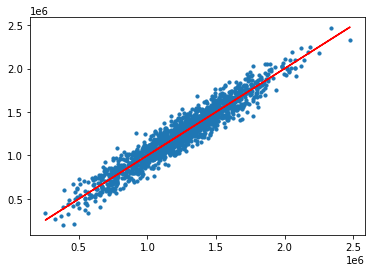

In [19]:
# add code here
predict = lm.predict(X_test)
plt.plot(predict,predict, color='r')
plt.scatter(x=predictions, y=y_test, s=10)
plt.show()

**Print the R-square value and round it to 3 decimal places**<br>
Hint: sklearn metrics.r2_score

In [20]:
# add code here
round(metrics.r2_score(predictions, y_test),3)

0.907

# 2) K-nearest neighbor Classification

### Import packages and dataset

In [21]:
# import numpy, pandas, matplotlib, seaborn
# add code here



%matplotlib inline

**Read classified_data.txt using pandas and call head() to show first few records. Call this dataframe "df"** <br>
Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created.

In [22]:
# add code here
df = pd.read_csv(classified_path, index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [23]:
# add code here
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [24]:
# add code here
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


### Check the spread of the features

**Store the column names in a list**

In [25]:
# add code here
col_name = list(df.columns)


**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() 

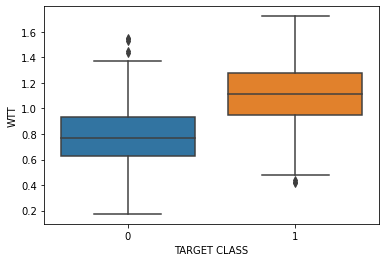

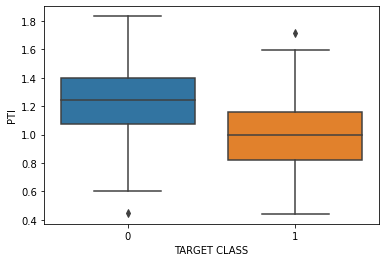

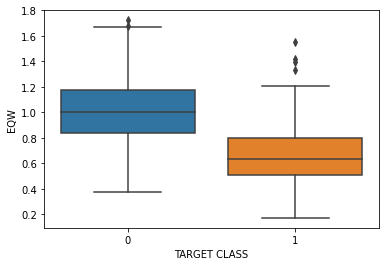

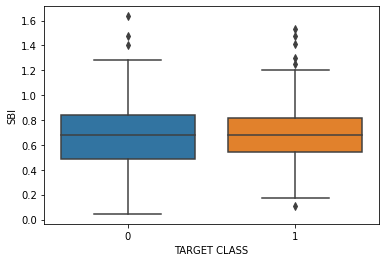

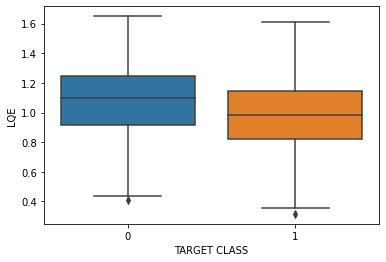

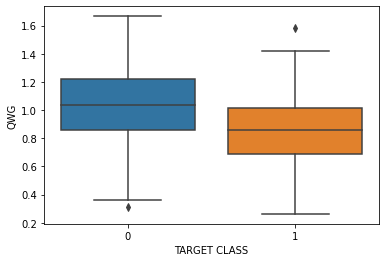

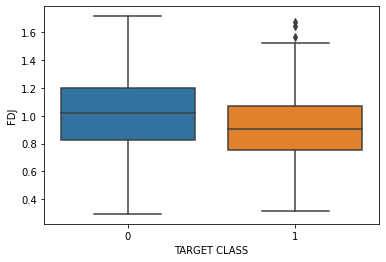

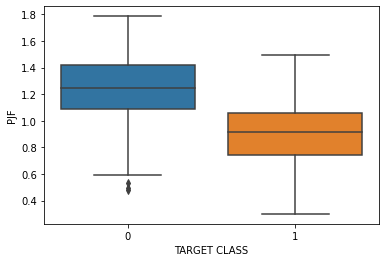

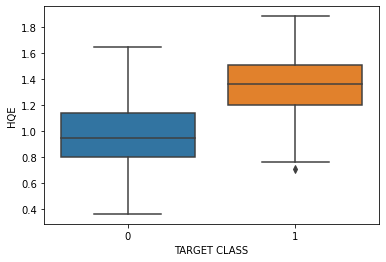

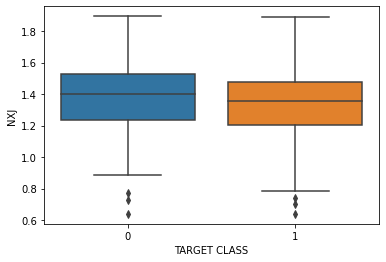

In [26]:
# add code here
new_col = col_name[:-1]
for i in new_col:
  sns.boxplot(y=i, x = 'TARGET CLASS', data =df)
  plt.show()

### Standardize the features using sklearn.preprocessing 
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.<br>
<br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [27]:
# add code here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [28]:
# add code here
scaler.fit(df[new_col])
scaler_t = scaler.transform(df[new_col])


**Scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [29]:
# add code here
df_feat = pd.DataFrame(scaler_t, columns = df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initaial dataframe "df"

In [30]:
# add code here
X = df_feat
y = df['TARGET CLASS']


**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [31]:
# add code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model fit and training

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1. Fit this on X_train and y_train**

In [32]:
# add code here
from sklearn.neighbors import KNeighborsClassifier
var = KNeighborsClassifier(n_neighbors=1)
var.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [33]:
# add code here
pred = var.predict(X_test)

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [34]:
# add code here
from sklearn.metrics import classification_report
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



**Print the accuracy using numpy and round it to 3 decimal places.**

In [35]:
# add code here
print(round(np.sum(y_test==pred)/len(y_test),3))

0.937


### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [36]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
# for each in a list
acc=[]
for i in range(1,60):
  var = KNeighborsClassifier(n_neighbors=i)
  var.fit(X_train, y_train)
  pred = var.predict(X_test)
  report = classification_report(y_test, pred, output_dict=True)
  acc.append(round(report["accuracy"], 3))

print(max(acc))


# add code here


0.953


**Plot a graph of K value vs Accuracy**

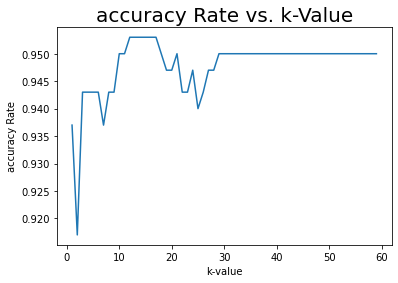

In [37]:
# add code here
ran = range(1,60)
plt.plot(ran,acc)
plt.title('accuracy Rate vs. k-Value', fontsize=20)
plt.xlabel('k-value',fontsize=10)
plt.ylabel('accuracy Rate',fontsize=10)

plt.show()

**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [38]:
# add code here 


In [39]:
print(max(acc))

0.953


# 3). Decision Tree Classifier

<b>read the titanic_data.csv using pandas and show the dataframe</b>

In [40]:
#write code here
df=pd.read_csv(titanic_path)
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<b>Write a function which accepts a dataframe, preprocesses the data (use task 1 notebook) and returns a new dataframe. </b> <br>
you may need a helper function for normalizing data so feel free to define that as well

In [41]:
def preprocessing_t1(train_df):
  import re
  names =[]
  for i in train_df.Name:
    title_search = re.search('(\w+)\.', i)
    if title_search:
      title = title_search.group(1)
      names.append(title)

  column_values = pd.Series(names)
  train_df.insert(loc=3, column='Title', value=column_values)

  train_df.drop(['PassengerId', 'Ticket', 'Name'], axis = 1, inplace=True)

  keys = train_df.columns
  value = []
  temp = 0
  for col in train_df.columns:
    x = train_df[col].isna().sum()
    perc = (x/len(train_df))*100
    value.append(perc)
  dic = dict(zip(keys, value))

  temp_df = pd.DataFrame(list(dic.items()),columns = ['Column','NAN Percentage'])

  for i in range (len(temp_df)):
    if temp_df.at[i, 'NAN Percentage'] > 50:
      train_df.drop([keys[i]], axis = 1, inplace=True)

  count1 = count2 = count3 = 0
  for i in range (len(train_df)):
    if train_df.at[i, 'Embarked'] == "C":
      count1 += 1
    elif train_df.at[i, 'Embarked'] == "S":
      count2 += 1
    else:
      count3 += 1
  if (count1 >= count2) and (count1 >= count3):
    largest = count1
  elif (count2 >= count1) and (count2 >= count3):
    largest = count2
  else:
    largest = count3
  train_df['Embarked'].fillna(largest, inplace=True)

  avg_age = train_df["Age"].mean()
  train_df['Age'].fillna(avg_age, inplace=True)

  total = train_df['SibSp'] + train_df['Parch']
  train_df["Family_members"] = total

  train_df.drop(['SibSp', 'Parch'], axis = 1, inplace=True)

  #Normalisation of Age
  age_maxes = train_df['Age'].max()
  df1_max = age_maxes
  age_mins = train_df['Age'].min()
  df1_min = age_mins
  normalized_age = (train_df['Age'] - df1_min) / (df1_max - df1_min)
  #Normalisation of Family Members
  family_maxes = train_df['Family_members'].max()
  df2_max = family_maxes
  family_mins = train_df['Family_members'].min()
  df2_min = family_mins
  normalized_family = (train_df['Family_members'] - df2_min) / (df2_max - df2_min)
  #Standardised Fare
  fare_maxes = train_df['Fare'].max()
  df3_max = fare_maxes
  standard_fare = (train_df['Fare'] / df3_max)

  dummy_pclass = (pd.get_dummies(train_df['Pclass']))
  for col in dummy_pclass:
      temp = dummy_pclass[col]
      train_df = train_df.join(temp)
  dummy_sex = pd.get_dummies(train_df['Sex'])
  for col in dummy_sex:
      temp = dummy_sex[col]
      train_df = train_df.join(temp)
  dummy_title = pd.get_dummies(train_df['Title'])
  for col in dummy_title:
      temp = dummy_title[col]
      train_df = train_df.join(temp)
  dummy_embarked = pd.get_dummies(train_df['Embarked'])
  for col in dummy_embarked:
      temp = dummy_embarked[col]
      train_df = train_df.join(temp)
  
  return train_df

titanic_df = preprocessing_t1(df)

<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [42]:
#write code here
y_label = titanic_df['Survived']

<b>remove the y_label (survived) from the dataframe</b>

In [43]:

titanic_df = titanic_df.drop(['Survived','Title','Embarked','Sex'], axis=1)

<b>Split the data into train and test. (do a split in the ratio 30:70)</b>

In [44]:
#write code here
#from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>

Make sure that you play with the hyperparameters to get a good result. You can even use bagging and boosting methods like random forest or adaboost to improve your accuracy. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

<b>Note that the accuracy on the test set will be considered and brownie points for not overfitting the model in the process</b>

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
dt= DecisionTreeClassifier(criterion='entropy')
rfc=RandomForestClassifier()
abc=AdaBoostClassifier(learning_rate=2)

dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<b>print the test accuracy and train accuracy here</b>

In [46]:
#write code here
# accuracy of X_test and X train
test=dt.predict(X_test)
print(round(metrics.accuracy_score(y_test, test),3))

train=dt.predict(X_train)
print(round(metrics.accuracy_score(y_train, train),3))

0.843
1.0


In [48]:
# Performing hyperparameter tuning
from sklearn.model_selection import GridSearchCV

criterion=['gini','entropy']
splitter=['best','random']
max_depth=list(range(1,10))
min_samples_leaf=list(range(1,10))
max_features=['auto','sqrt','log2']


hyperparameters = dict(criterion=criterion,splitter=splitter,max_depth=max_depth,min_samples_leaf=min_samples_leaf,max_features=max_features)

dtc_2=DecisionTreeClassifier()

clf = GridSearchCV(dtc_2, hyperparameters, cv=10)

best_model= clf.fit(X_train,y_train)

print('Best criterion:', best_model.best_estimator_.get_params()['criterion'])
print('Best splitter:', best_model.best_estimator_.get_params()['splitter'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', best_model.best_estimator_.get_params()['max_features'])

Best criterion: gini
Best splitter: best
Best max_depth: 5
Best min_samples_leaf: 1
Best max_features: auto


In [60]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
dtc_3=DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=9,min_samples_leaf=2)

dtc_3.fit(X_train,y_train)

Y_pred=dtc_3.predict(X_test)

report=classification_report(y_test,Y_pred,output_dict=True)
confusion_matrix=confusion_matrix(y_test,Y_pred)

print(confusion_matrix)
#print(report)
print(round(report['accuracy'],3))

[[131  11]
 [ 26 132]]
0.877


In [58]:
# k fold cross validation
from sklearn.model_selection import cross_val_score

print(cross_val_score(dtc_3,X_train,y_train,cv=10))
print(np.mean(cross_val_score(dtc_3,X_train,y_train,cv=10)))

[0.87142857 0.9        0.87142857 0.82857143 0.85714286 0.87142857
 0.82857143 0.87142857 0.88571429 0.8       ]
0.8628571428571428
